<a href="https://colab.research.google.com/github/Phillkao/Project/blob/master/Quality_prediction_data(testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import os

#### FILE PATH

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 20160419001_2016419_114348.xls to 20160419001_2016419_114348 (2).xls
Saving 20160419002_2016419_132916.xls to 20160419002_2016419_132916 (2).xls
Saving 20160419004_2016419_153453.xls to 20160419004_2016419_153453 (2).xls
Saving 20160419005_2016419_164411.xls to 20160419005_2016419_164411 (2).xls
Saving 20160421002_2016421_171815.xls to 20160421002_2016421_171815 (2).xls
Saving 20160421003_2016421_182129.xls to 20160421003_2016421_182129 (2).xls
Saving 20160422001_2016422_95822.xls to 20160422001_2016422_95822 (2).xls
Saving 20160422002_2016422_111140.xls to 20160422002_2016422_111140 (2).xls
Saving 20160422003_2016422_161044.xls to 20160422003_2016422_161044 (2).xls
Saving 20160425001_2016425_94440.xls to 20160425001_2016425_94440 (2).xls
Saving 20160425002_2016425_104626.xls to 20160425002_2016425_104626 (2).xls
Saving 20160425003_2016425_11527.xls to 20160425003_2016425_11527 (2).xls
Saving 20160425004_2016425_131231.xls to 20160425004_2016425_131231 (2).xls
Saving 20160425005

In [0]:
pathl = []
df = []
t = []
for fn in uploaded.keys():
    pathl.append(fn)
for i in range(40):
    df.append("df%d" % i)  
    t.append("t%d" % i)

In [0]:
y = []
data1=[]
data2=[]
data3=[]
data4 =[]
X_1 = []
X_2 = []
for i in range(40):
    #read files into list
    df[i] = pd.read_excel(pathl[i])
    
    #dealing with y array
    df_y = df[i].loc[7499]
    y.append(np.float64(df_y.values[0][9:]))
    df[i] = df[i][0:7499]
    
    #cleaning data
    col_1 = pd.DataFrame(df[i].columns.values.reshape(1,4), index=[0], columns = list('ABCD'), dtype= float)
    df[i].columns = list('ABCD')
    df[i] = pd.concat([col_1, df[i]], axis=0)
    df[i].index = range(1,7501)
    
    #dtype of COL_A is 'object', change into float ???????
    df[i].A = pd.to_numeric(df[i].A)
    
    ##data
    data1 = np.append(data1, df[i].A)
    data2 = np.append(data2, df[i].B)
    data3 = np.append(data3, df[i].C)
    data4 = np.append(data4, df[i].D)
    

data1 = np.array(data1)
data2 = np.array(data2)
data3 = np.array(data3)
data4 = np.array(data4)
X_1 = np.append(data1, data2)
X_2 = np.append(data3, data4)
X_1 = np.array(X_1)
X_2 = np.array(X_2)

    #testing
    

#### Get y_array (predicted value array)

In [0]:
Y = np.array(y,dtype=float)

#### Get Cleaned data and X_array (training data) 

In [6]:
df[0].describe()

,A,B,C,D
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,2.798203e-06,2.867940e-06,2.724916e-06,1.806650e-06
std,8.643169e-06,6.945007e-06,3.662671e-06,2.355944e-06
min,1.573569e-08,2.150493e-08,2.767096e-08,3.411193e-08
25%,8.920254e-07,9.457329e-07,1.175372e-06,7.952370e-07
50%,1.509237e-06,1.610652e-06,1.868123e-06,1.283463e-06
75%,2.541986e-06,2.722913e-06,2.847342e-06,1.979565e-06
max,3.522643e-04,2.220868e-04,5.263960e-05,3.069520e-05


In [7]:
X = np.zeros((40, 7500, 4))
for i in range(40):
    X[i] = df[i].values
X

array([[[2.29657713e-05, 2.12655233e-05, 1.98152050e-05, 2.05591031e-05],
        [2.25512117e-05, 2.04522481e-05, 1.65413600e-05, 3.75979720e-06],
        [1.12122347e-05, 1.06301152e-05, 9.00513646e-06, 8.94675372e-07],
        ...,
        [5.54606497e-06, 5.53112018e-06, 1.20886168e-06, 1.38705042e-06],
        [1.83502828e-06, 2.49113887e-06, 1.40519630e-06, 1.12200520e-06],
        [5.03722061e-06, 4.11050389e-06, 2.75695883e-06, 2.46315690e-06]],

       [[1.90828755e-05, 1.26615728e-05, 5.78274832e-06, 6.62764342e-06],
        [7.82511474e-06, 7.99490305e-06, 1.29762099e-05, 6.29210757e-06],
        [6.23351384e-06, 8.05313479e-06, 1.12671924e-05, 7.28125021e-06],
        ...,
        [3.80067341e-06, 4.04373462e-06, 1.54675334e-06, 6.17541114e-07],
        [3.43747548e-06, 3.05047083e-06, 1.93052147e-06, 1.53228872e-06],
        [3.64677161e-06, 4.40090019e-06, 1.20959709e-06, 1.12510181e-06]],

       [[1.33143539e-05, 9.22924659e-06, 2.90081151e-06, 8.99624176e-06],
        

## data analysis

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 1)

print(x_train.shape,x_test.shape,
      y_train.shape,y_test.shape)

xtrain = x_train.reshape(len(x_train), 7500*4)
xtest = x_test.reshape(len(x_test), 7500*4)
print(xtrain.shape,xtest.shape)

x_train = (xtrain - xtrain.min()) / (xtrain.max() - xtrain.min())
x_test = (xtest - xtest.min()) / (xtest.max() - xtest.min())
x_test.max(),x_train.min()

(32, 7500, 4) (8, 7500, 4) (32,) (8,)
(32, 30000) (8, 30000)


(1.0, 0.0)

(0, 10)

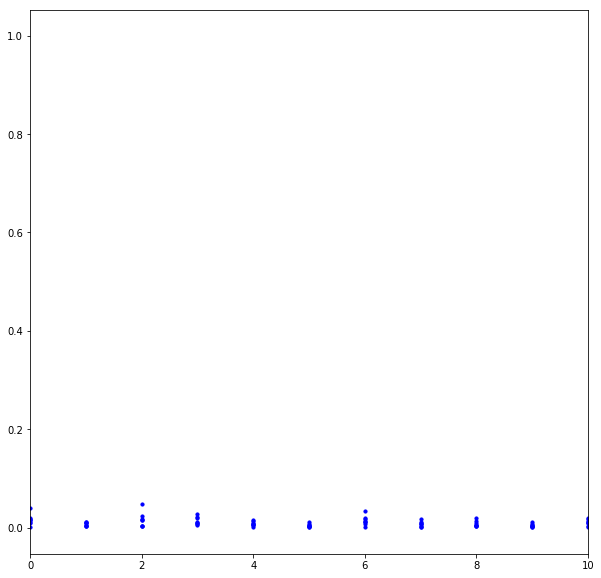

In [9]:
plt.figure(1, figsize=(10,10))
for i in range(8):
    plt.scatter(np.arange(30000), x_test[i] , c = 'blue',s = 10)
plt.xlim(0,10)

### By using ARtime series testing

In [0]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset

In [11]:
# fit model
for data in [data1,data2,data3,data4]:
    data.reshape(300000,)
    model = AR(data)
    model_fit = model.fit()
# make prediction
    print('Lag: %s' % model_fit.k_ar)
    print('Coefficients: %s' % model_fit.params)

Lag: 89
Coefficients: [ 9.86580549e-07  4.80630865e-01  3.86899141e-02  3.59014063e-02
  1.03144644e-02  1.28539895e-02  7.03713887e-03  5.35838922e-03
  5.03589272e-03  2.22439060e-03  1.81348200e-03  3.32520271e-03
  3.53444297e-03  2.07479044e-03  6.14155070e-03  6.25915641e-04
  2.84612189e-04  9.99755064e-04 -1.18755771e-03  4.47837563e-04
 -1.52385541e-03  2.28603062e-03  2.22078770e-03  3.51661453e-03
  7.72603356e-04  4.04173062e-03  2.47572057e-03  3.97750200e-04
  4.05041607e-03 -2.22426676e-03  4.34406282e-03  6.04758473e-03
 -5.31365771e-03  3.53751613e-03  3.00220700e-02 -9.49960279e-03
  3.60185222e-03 -4.36936715e-03 -5.48627350e-03  4.12480053e-03
  1.03166545e-02 -2.00144708e-03 -4.89121416e-03 -3.20982289e-03
 -3.44306032e-03  5.39185783e-03 -2.61921422e-04 -4.52625900e-04
  3.18845443e-03 -4.35652680e-03 -1.31869098e-03 -2.66371501e-03
 -3.20852206e-04  7.43551406e-03 -5.15688683e-03 -1.22659280e-03
 -1.71333224e-03 -2.12152338e-04  2.67398476e-03 -4.03690282e-05
 -4

### correlation analysis

In [12]:
for i in range(40):
    print(df[i].corr())

          A         B         C         D
A  1.000000  0.810577  0.424371  0.552636
B  0.810577  1.000000  0.435864  0.565078
C  0.424371  0.435864  1.000000  0.800555
D  0.552636  0.565078  0.800555  1.000000
          A         B         C         D
A  1.000000  0.760600  0.507784  0.576173
B  0.760600  1.000000  0.418676  0.478727
C  0.507784  0.418676  1.000000  0.806351
D  0.576173  0.478727  0.806351  1.000000
          A         B         C         D
A  1.000000  0.795195  0.514413  0.585885
B  0.795195  1.000000  0.409598  0.479964
C  0.514413  0.409598  1.000000  0.790886
D  0.585885  0.479964  0.790886  1.000000
          A         B         C         D
A  1.000000  0.834213  0.496393  0.575106
B  0.834213  1.000000  0.401142  0.494696
C  0.496393  0.401142  1.000000  0.774638
D  0.575106  0.494696  0.774638  1.000000
          A         B         C         D
A  1.000000  0.739037  0.553212  0.573156
B  0.739037  1.000000  0.418777  0.468469
C  0.553212  0.418777  1.000000  0

In [13]:
data1 = (data1 - data1.min()) / (data1.max() - data1.min())
data2 = (data2 - data2.min()) / (data2.max() - data2.min())
data3 = (data3 - data3.min()) / (data3.max() - data3.min())
data4 = (data4 - data4.min()) / (data4.max() - data4.min())
data1.max() , data1.min()

(1.0, 0.0)

(0, 1)

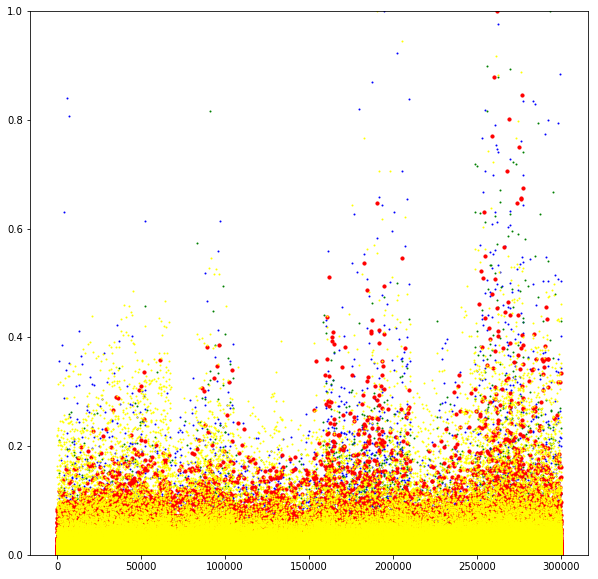

In [14]:
 
    
plt.figure(1, figsize=(10,10))
plt.scatter(np.arange(300000), data1 , c = 'blue',s = 1)
plt.scatter(np.arange(300000), data2 , c = 'green',s = 1)
plt.scatter(np.arange(300000), data3 , c = 'red',s = 10)
plt.scatter(np.arange(300000), data4 , c = 'yellow',s = 1)

plt.ylim(0, 1)


In [15]:
len(data1)

300000

### construct nn

In [0]:
for i in range(40):
    T = pd.concat([df[i].A,df[i].B])
    S = pd.concat([df[i].C,df[i].D])
    dic1 = {'A':T , 'B': S}
    t[i] = pd.DataFrame(dic1)
    t[i].index = range(1,15001)

In [17]:
T = np.zeros((40, 15000, 2))
for i in range(40):
    T[i] = t[i].values
T

array([[[2.29657713e-05, 1.98152050e-05],
        [2.25512117e-05, 1.65413600e-05],
        [1.12122347e-05, 9.00513646e-06],
        ...,
        [5.53112018e-06, 1.38705042e-06],
        [2.49113887e-06, 1.12200520e-06],
        [4.11050389e-06, 2.46315690e-06]],

       [[1.90828755e-05, 5.78274832e-06],
        [7.82511474e-06, 1.29762099e-05],
        [6.23351384e-06, 1.12671924e-05],
        ...,
        [4.04373462e-06, 6.17541114e-07],
        [3.05047083e-06, 1.53228872e-06],
        [4.40090019e-06, 1.12510181e-06]],

       [[1.33143539e-05, 2.90081151e-06],
        [1.17612376e-05, 2.85707201e-05],
        [1.11893617e-05, 1.56680878e-05],
        ...,
        [6.82580713e-07, 2.18332221e-06],
        [2.07701239e-06, 1.16757922e-06],
        [1.43784577e-06, 5.07022683e-07]],

       ...,

       [[8.14204897e-06, 8.41420292e-06],
        [2.71323674e-06, 2.85430684e-05],
        [5.15385116e-06, 5.94335525e-06],
        ...,
        [3.18866548e-06, 2.38071965e-06],
     

In [18]:
x_tr, x_te , y_train, y_test = train_test_split(T, Y, test_size = 0.2, random_state= 1)

print(x_tr.shape,x_te.shape)

(32, 15000, 2) (8, 15000, 2)


In [0]:
xtr = x_tr.reshape(len(x_tr), 2*15000)
xte = x_te.reshape(len(x_te), 2*15000)

In [20]:
xtr.shape

(32, 30000)

In [21]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Input, Model, Sequential
from keras.activations import selu,sigmoid, K
from keras.layers import Dense, LSTM, RNN,Embedding,BatchNormalization, Dropout
from keras.losses import MSE, categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing import sequence

In [23]:
model = Sequential()
model.add(Embedding(30000, 100))

model.add(BatchNormalization())

model.add(LSTM(100,dropout=0.5, recurrent_dropout=0.5))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(1, activation='selu'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 100)         400       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,081,301
Trainable params: 3,080,901
Non-trainable params: 400
________________________________________________________________

In [0]:
model.compile(loss = 'mse',
             optimizer = Adam(lr = 0.00001))

In [0]:
xtr = (xtr - xtr.min()) / (xtr.max() - xtr.min())
xte = (xte - xte.min()) / (xte.max() - xte.min())


In [31]:
model.fit(xtr,y_train, batch_size = 10, epochs = ,
         verbose = 1,
         validation_data = (xte, y_test))

Train on 32 samples, validate on 8 samples
Epoch 1/5
32/32 [==============================] - 107s 3s/step - loss: 0.4421 - val_loss: 0.4012
Epoch 2/5
32/32 [==============================] - 108s 3s/step - loss: 0.4281 - val_loss: 0.4283
Epoch 3/5
32/32 [==============================] - 108s 3s/step - loss: 0.3772 - val_loss: 0.4410
Epoch 4/5
32/32 [==============================] - 107s 3s/step - loss: 0.4555 - val_loss: 0.4340
Epoch 5/5
32/32 [==============================] - 107s 3s/step - loss: 0.4634 - val_loss: 0.4167


In [28]:
  xte[0]

array([0.01557627, 0.00339105, 0.01375892, ..., 0.00136294, 0.00167919,
       0.00059   ])

In [29]:
y_train

array([0.9264, 1.0736, 0.4737, 0.5549, 0.3311, 0.928 , 0.3708, 0.3477,
       0.8483, 0.3246, 0.4251, 0.8454, 0.6266, 0.7436, 0.5636, 0.4922,
       0.705 , 1.1181, 0.4732, 0.4438, 0.453 , 0.4044, 0.4189, 0.667 ,
       0.306 , 0.5717, 0.6547, 0.5883, 0.5515, 0.3992, 0.7471, 0.4148])

In [32]:
model.predict(xtr)

array([[-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714],
       [-0.04594714]], dtype=float32)